# Reproducing Figure 3 in Porter et al., 2011

In this example we generate *P* receiver functions for a model that includes either a dipping lower crustal layer or a lower-crustal anisotropic layer. These example reproduce the results of Figure 3 in [Porter et al. (2011)](#references).

Start by importing the necessary packages:

In [1]:
import numpy as np
from pyraysum import prs

Define the arrays of slowness and back-azimuth values of the incident `P` wave to use as input in the simulation

In [2]:
baz = np.arange(0., 360., 10.)
slow = 0.06

Load the model file that includes layer dip

In [3]:
model = prs.read_model('../models/model_Porter2011_dip.txt')

Run the simulation. Here we specify the argument `rot=1` to produce seismograms aligned in the `R-T-Z` coordinate system. The default value is `rot=0`, which produces seismograms aligned in the `N-E-Z` coordinate system, which cannot be used to calculate receiver functions. Furthermore, we are interested only in the direct conversions, and therefore specify `mults=0` to avoid dealing with multiples. This is required to reproduce the published examples, although it is good practice to keep all first-order multiples to properly simulate the full Green's functions.

In [4]:
streamlist = prs.run_prs(model, baz, slow, rot=1, mults=0)

The function returns a `StreamList` object whose attributes are the `Model`, geometry `(baz, slow)`, a list of `Streams` as well as all run-time arguments that are used by Raysum:

In [5]:
streamlist.__dict__.keys()

dict_keys(['model', 'geom', 'streams', 'args'])

We can then use the method `calculate_rfs` to calculate receiver functions:

In [6]:
streamlist.calculate_rfs()

The receiver functions are stored as an additional attribute of the streamlist object, which is itself a list of `Streams` containing the radial and transverse component RFs:

In [7]:
streamlist.__dict__.keys()

dict_keys(['model', 'geom', 'streams', 'args', 'rfs'])

We can now filter and plot the results - we specify the key `'rfs'` to work on the receiver functions only. 

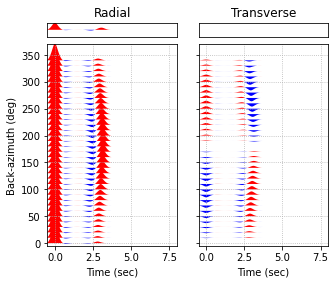

In [8]:
streamlist.filter('rfs', 'lowpass', freq=1., zerophase=True, corners=2)
streamlist.plot('rfs', tmin=-0.5, tmax=8.)

Now let's reproduce the second case with the anisotropic lower crustal layer. We simply load the corresponding model and run the functions sequentially again:

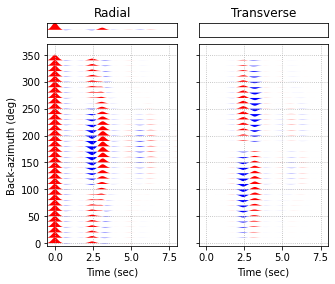

In [9]:
model = prs.read_model('../models/model_Porter2011_aniso.txt')
streamlist = prs.run_prs(model, baz, slow, dt=0.01, npts=6000, rot=1,
                         verbose=False, wvtype='P', mults=0)
streamlist.calculate_rfs()

streamlist.filter('rfs', 'lowpass', freq=1., zerophase=True, corners=2)
streamlist.plot('rfs', tmin=-0.5, tmax=8.)

## References

* Frederiksen, A.W., & Bostock, M.G. (2000). Modelling teleseismic waves in dipping anisotropic structures. Geophysical Journal International, 141, 401-412. https://doi.org/10.1046/j.1365-246x.2000.00090.x
* Porter, R., Zandt, G., & McQuarrie, N. (2011). Pervasive lower-crustal seismic anisotropy in Southern California: Evidence for underplated schists and active tectonics. Lithosphere, 3(3), 201-220. https://doi.org/10.1130/L126.1